# Example usage of aggregated NHCI drifter data v0.

Example code for loading and working with Spotter data from the NHCI
aggregated drifter dataset in Python .pickle format. Since all datasets
have the same variable names and structure, this example framework can
also be used for DWSD and microSWIFT drifters.

Contact Jake Davis (davisjr@uw.edu) with any questions.

In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import pandas as pd

### I/O

In [2]:
DATA_DIRECTORY = 'D:/crs/proj/2025_NOPP_comparison/helene_drifters/'
DATA_FILENAME = 'hurricane_helene_drifter_data_v0.pickle'

In [3]:
with open(os.path.join(DATA_DIRECTORY, DATA_FILENAME), 'rb') as handle:
    drifter_dict = pickle.load(handle)

C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_55048\3496847223.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  drifter_dict = pickle.load(handle)


### Structure

`drifter_dict` is a python dictionary keyed by drifter type (spotter,
dwsd, or microswift)

In [4]:
spotter_dict = drifter_dict['spotter']

`spotter_dict` is a python dictionary of Pandas DataFrames, keyed by
each drifter ID. The drifter ids can then be accessed as follows:

In [5]:
spotter_ids = list(spotter_dict.keys())

The data for a single ID is a Pandas DataFrame. For example, the last ID can be accessed as:

In [6]:
spotter_id = spotter_ids[-1]
print(spotter_id)

spotter_df = spotter_dict[spotter_id]
spotter_df.info()

SPOT-31995C
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2024-09-25 00:15:00+00:00 to 2024-09-28 23:55:00+00:00
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   drifter_type              288 non-null    object 
 1   latitude                  288 non-null    float64
 2   longitude                 288 non-null    float64
 3   significant_height        96 non-null     float64
 4   peak_period               96 non-null     float64
 5   peak_direction            96 non-null     float64
 6   peak_directional_spread   96 non-null     float64
 7   mean_period               96 non-null     float64
 8   mean_direction            96 non-null     float64
 9   mean_directional_spread   96 non-null     float64
 10  frequency                 96 non-null     object 
 11  energy_density            96 non-null     object 
 12  a1                        96 non-null     object 
 13  b1  

Variables are queried using the column name:

In [7]:
# This works:
spotter_df['significant_height']

# But use of .loc is preferred (where `:` indicates all rows)
spotter_df.loc[:, 'significant_height']

time
2024-09-25 00:15:00+00:00    0.505
2024-09-25 00:35:00+00:00      NaN
2024-09-25 00:55:00+00:00      NaN
2024-09-25 01:15:00+00:00    0.498
2024-09-25 01:35:00+00:00      NaN
                             ...  
2024-09-28 22:35:00+00:00      NaN
2024-09-28 22:55:00+00:00      NaN
2024-09-28 23:15:00+00:00    0.889
2024-09-28 23:35:00+00:00      NaN
2024-09-28 23:55:00+00:00      NaN
Name: significant_height, Length: 288, dtype: float64

(The NaNs are expected--see the **important note** below!)

The DataFrame is indexed by time. The array of datetimes can be
accessed using the index property; this also enables slicing the
dataset over two datetimes.

In [8]:
spotter_df.index # array of datetimes

start_date = pd.Timestamp('2024-09-26 12:00', tz='UTC')
end_date = pd.Timestamp('2024-09-27 12:00', tz='UTC')
spotter_df.loc[start_date:end_date, :]

,drifter_type,latitude,longitude,significant_height,peak_period,peak_direction,peak_directional_spread,mean_period,mean_direction,mean_directional_spread,frequency,energy_density,a1,b1,a2,b2,wave_check_factor,scalar_wave_check_factor,sea_surface_temperature,sea_level_pressure
time,,,,,,,,,,,,,,,,,,,,
2024-09-26 12:15:00+00:00,spotter,27.522080,-83.764680,4.222,10.240,168.227,18.371086,7.940206,160.857278,28.368958,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.432095232, 0.7801896960000001, 0.648167424,...","[-0.026393, -0.053763, -0.11828, -0.107527, 0....","[0.160313, 0.226784, 0.304008, 0.352884, 0.510...","[-0.11828, -0.082111, -0.004888, -0.209189, -0...","[-0.371456, -0.4565, -0.437928, -0.334311, -0....",NaN,NaN,30.20,999.1
2024-09-26 12:35:00+00:00,spotter,27.532733,-83.773100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.20,998.8
2024-09-26 12:55:00+00:00,spotter,27.543283,-83.782350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.18,998.8
2024-09-26 13:15:00+00:00,spotter,27.553800,-83.790920,4.314,10.240,165.892,18.753253,7.988163,161.280795,27.695164,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.0059965439999999995, 0.018014208000000004, ...","[-0.212121, -0.225806, -0.31085, -0.217009, 0....","[0.44477, 0.391984, 0.457478, 0.423265, 0.5835...","[-0.302053, -0.26393, -0.235582, -0.228739, -0...","[-0.338221, -0.28739, -0.347019, -0.329423, -0...",NaN,NaN,30.18,998.9
2024-09-26 13:35:00+00:00,spotter,27.564650,-83.800500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.18,998.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27 10:35:00+00:00,spotter,28.426900,-84.056317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.74,1000.6
2024-09-27 10:55:00+00:00,spotter,28.430933,-84.052100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.74,1001.1
2024-09-27 11:15:00+00:00,spotter,28.435020,-84.047030,3.067,8.533,284.587,39.311193,6.807981,272.901173,42.859691,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.008003584, 0.018006016, 0.02400256, 0.02200...","[0.333333, 0.258065, 0.314761, 0.531769, 0.413...","[0.002933, -0.006843, 0.086999, 0.089932, 0.33...","[0.407625, 0.307918, 0.211144, 0.294233, 0.251...","[-0.043988, 0.009775, -0.018573, 0.073314, 0.2...",NaN,NaN,29.74,1001.6


### Example: plot significant wave height over the entire dataset.


Text(0.5, 1.0, 'SPOT-31995C significant wave height')

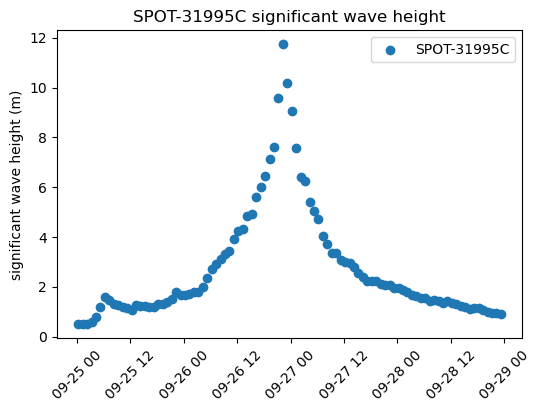

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(
    spotter_df.index,
    spotter_df.loc[:, 'significant_height'],
    label=spotter_id,
)
ax.set_ylabel('significant wave height (m)')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_title(f'{spotter_id} significant wave height')

### Example: plot significant wave height over the specified datetimes.

Text(0.5, 1.0, 'SPOT-31995C significant wave height from \n 26 Sep 12Z to 27 Sep 12Z')

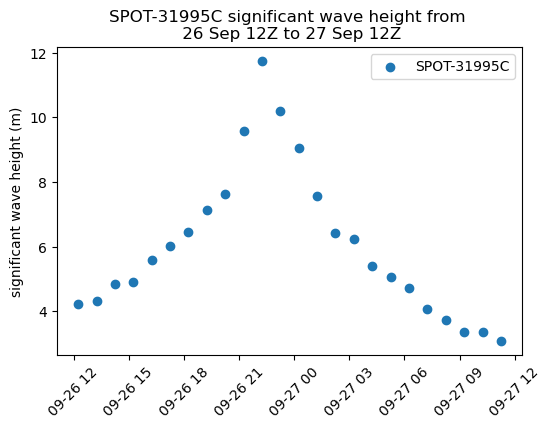

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(
    spotter_df.loc[start_date:end_date].index,
    spotter_df.loc[start_date:end_date, 'significant_height'],
    label = spotter_id,
)
ax.set_ylabel('significant wave height (m)')
ax.legend()
ax.tick_params(axis='x', rotation=45)
date_format = '%d %b %HZ'
ax.set_title(
    f'{spotter_id} significant wave height from \n '
    f'{start_date.strftime(date_format)} to {end_date.strftime(date_format)}'
)

### Example: plot energy as a function of frequency
Plot the spectra over the specified datetimes (a loop is the easiest way to do this).

Text(0.5, 1.0, 'SPOT-31995C energy density spectra from \n 26 Sep 12Z to 27 Sep 12Z')

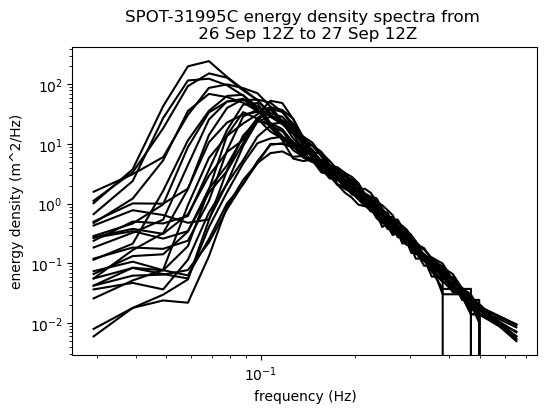

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
for E,f in zip(spotter_df.loc[start_date:end_date, 'energy_density'],
               spotter_df.loc[start_date:end_date, 'frequency']):
    ax.plot(f, E, color='k')

ax.set_ylabel('energy density (m^2/Hz)')
ax.set_xlabel('frequency (Hz)')
ax.set_xscale('log')
ax.set_yscale('log')
date_format = '%d %b %HZ'
ax.set_title(
    f'{spotter_id} energy density spectra from \n '
    f'{start_date.strftime(date_format)} to {end_date.strftime(date_format)}'
)

### Other tips

A DataFrame of all drifters with the same type can be created directly from the dictionary.  The result is a DataFrame that is multi-indexed by time and ID
(see https://pandas.pydata.org/docs/user_guide/advanced.html).

In [12]:
all_spotter_df = pd.concat(spotter_dict, names=['id', 'time'])
all_spotter_df

drifter_type   latitude  longitude  \
id          time                                                           
SPOT-31990C 2024-09-25 03:55:00+00:00      spotter  29.979700 -86.140330   
            2024-09-25 04:55:00+00:00      spotter  29.985570 -86.146700   
            2024-09-25 05:55:00+00:00      spotter  29.991220 -86.150470   
            2024-09-25 06:55:00+00:00      spotter  29.996520 -86.151730   
            2024-09-25 07:55:00+00:00      spotter  30.000320 -86.154180   
...                                            ...        ...        ...   
SPOT-31995C 2024-09-28 22:35:00+00:00      spotter  28.582067 -83.772683   
            2024-09-28 22:55:00+00:00      spotter  28.581650 -83.769600   
            2024-09-28 23:15:00+00:00      spotter  28.581550 -83.766530   
            2024-09-28 23:35:00+00:00      spotter  28.581700 -83.763300   
            2024-09-28 23:55:00+00:00      spotter  28.581767 -83.759683   

                                       significant_height  peak_period  \
id          time                                                         
SPOT-31990C 2024-09-25 03:55:00+00:00               0.857        4.096   
            2024-09-25 04:55:00+00:00               0.785        4.096   
            2024-09-25 05:55:00+00:00               0.733        3.938   
            2024-09-25 06:55:00+00:00               0.673        5.389   
            2024-09-25 07:55:00+00:00               0.638        5.389   
...                                                   ...          ...   
SPOT-31995C 2024-09-28 22:35:00+00:00                 NaN          NaN   
            2024-09-28 22:55:00+00:00                 NaN          NaN   
            2024-09-28 23:15:00+00:00               0.889        6.400   
            2024-09-28 23:35:00+00:00                 NaN          NaN   
            2024-09-28 23:55:00+00:00                 NaN          NaN   

                                       peak_direction  \
id          time                                        
SPOT-31990C 2024-09-25 03:55:00+00:00         127.181   
            2024-09-25 04:55:00+00:00         128.601   
            2024-09-25 05:55:00+00:00         128.931   
            2024-09-25 06:55:00+00:00         138.272   
            2024-09-25 07:55:00+00:00         135.779   
...                                               ...   
SPOT-31995C 2024-09-28 22:35:00+00:00             NaN   
            2024-09-28 22:55:00+00:00             NaN   
            2024-09-28 23:15:00+00:00         272.606   
            2024-09-28 23:35:00+00:00             NaN   
            2024-09-28 23:55:00+00:00             NaN   

                                       peak_directional_spread  mean_period  \
id          time                                                              
SPOT-31990C 2024-09-25 03:55:00+00:00                25.709238     3.946361   
            2024-09-25 04:55:00+00:00                25.708424     3.925176   
            2024-09-25 05:55:00+00:00                25.334135     3.903908   
            2024-09-25 06:55:00+00:00                21.039632     3.945869   
            2024-09-25 07:55:00+00:00                23.589515     3.899171   
...                                                        ...          ...   
SPOT-31995C 2024-09-28 22:35:00+00:00                      NaN          NaN   
            2024-09-28 22:55:00+00:00                      NaN          NaN   
            2024-09-28 23:15:00+00:00                30.304299     4.959117   
            2024-09-28 23:35:00+00:00                      NaN          NaN   
            2024-09-28 23:55:00+00:00                      NaN          NaN   

                                       mean_direction  \
id          time                                        
SPOT-31990C 2024-09-25 03:55:00+00:00      132.317078   
            2024-09-25 04:55:00+00:00      132.143635   
            2024-09-25 05:55:00+00:00      134.135331   
            2024-09-25 06:55:00

**Important note:** some Spotter datasets contain barometer and
temperature measurements interspersed at a different time interval
than the wave measurements. This means rows corresponding to times
where there are pressure and temperature measurements, but not wave
measurements, will contain NaNs for wave properties. This is rarely a
problem, except for when a lineplot or the extraction of all
spectral data as a single matrix is desired. In these cases, the rows
containing NaNs can be filtered out using the notnull() method (and
the wave data can be assigned to a new variable, if neccessary).

In [13]:
only_waves = spotter_df['energy_density'].notnull()
spotter_df[only_waves]

,drifter_type,latitude,longitude,significant_height,peak_period,peak_direction,peak_directional_spread,mean_period,mean_direction,mean_directional_spread,frequency,energy_density,a1,b1,a2,b2,wave_check_factor,scalar_wave_check_factor,sea_surface_temperature,sea_level_pressure
time,,,,,,,,,,,,,,,,,,,,
2024-09-25 00:15:00+00:00,spotter,27.08635,-83.20085,0.505,4.876,147.606,18.658772,3.944217,145.500180,30.768574,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.001250304, 0.000750592, 0.000499712, 0.0012...","[0.125122, -0.086021, -0.13001, -0.096774, -0....","[-0.113392, -0.066471, -0.068426, -0.018573, 0...","[0.134897, 0.111437, 0.071359, 0.15738, 0.1427...","[-0.363636, -0.269795, -0.266862, -0.251222, -...",NaN,NaN,30.72,1010.9
2024-09-25 01:15:00+00:00,spotter,27.08742,-83.20338,0.498,4.655,145.664,20.245129,3.935978,146.014464,31.012555,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.00150016, 0.0027504639999999998, 0.00400076...","[-0.047898, 0.002933, -0.038123, -0.02346, -0....","[0.14565, 0.048876, -0.034213, 0.022483, 0.013...","[0.097752, 0.097752, 0.043988, 0.115347, 0.159...","[-0.57087, -0.486804, -0.383187, -0.268817, -0...",NaN,NaN,30.68,1011.3
2024-09-25 02:15:00+00:00,spotter,27.08902,-83.20953,0.520,4.876,147.754,20.469224,3.760899,140.673575,37.788053,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.003750912, 0.007251968, 0.00625152000000000...","[-0.029325, 0.016618, 0.034213, -0.038123, -0....","[0.031281, -0.017595, -0.111437, -0.01173, -0....","[-0.096774, -0.139785, -0.280547, -0.218964, 0...","[-0.148583, -0.163245, -0.221896, -0.233627, -...",NaN,NaN,30.62,1011.5
2024-09-25 03:15:00+00:00,spotter,27.09300,-83.22107,0.572,4.876,150.067,22.530018,3.474382,126.781689,41.143762,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.004250624, 0.00925184, 0.007002112000000000...","[-0.02737, 0.059629, 0.100684, -0.01564, -0.10...","[-0.138807, -0.033236, 0.025415, 0.079179, -0....","[-0.326491, -0.202346, -0.175953, -0.268817, -...","[0.021505, -0.041056, -0.139785, -0.031281, 0....",NaN,NaN,30.60,1011.3
2024-09-25 04:15:00+00:00,spotter,27.09860,-83.23700,0.803,3.793,106.113,29.220406,3.622508,112.180572,36.998687,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.004250624, 0.00925184, 0.011502592, 0.00550...","[-0.050831, -0.097752, -0.119257, -0.058651, -...","[-0.000978, 0.010753, 0.059629, 0.042033, 0.07...","[0.016618, -0.114369, -0.140762, -0.02346, 0.1...","[0.119257, 0.044966, -0.094819, -0.021505, -0....",NaN,NaN,30.58,1010.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-28 19:15:00+00:00,spotter,28.59162,-83.79280,1.049,6.400,271.236,34.810301,5.209647,256.696614,45.744951,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.001501184, 0.003500032, 0.004501504, 0.0025...","[0.017595, 0.098729, 0.013685, -0.063539, 0.04...","[-0.101662, -0.054741, 0.020528, 0.033236, 0.0...","[-0.180841, -0.107527, -0.010753, 0.035191, -0...","[-0.26393, -0.178886, -0.222874, -0.101662, -0...",NaN,NaN,30.06,1010.5
2024-09-28 20:15:00+00:00,spotter,28.58825,-83.78887,0.986,6.827,270.193,29.105699,5.114493,257.787222,43.817195,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.002500608, 0.004000768, 0.00325119999999999...","[-0.013685, -0.013685, 0.030303, 0.097752, 0.0...","[0.089932, 0.107527, 0.040078, 0.075269, 0.000...","[0.16911, 0.160313, 0.055718, -0.101662, 0.059...","[-0.350929, -0.341153, -0.229717, -0.018573, -...",NaN,NaN,30.10,1010.5
2024-09-28 21:15:00+00:00,spotter,28.58533,-83.78332,0.961,6.400,270.260,30.293825,5.050125,258.942647,42.480857,"[0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...","[0.00150016, 0.002500608, 0.004250624, 0.00300...","[-0.119257, -0.136852, -0.037146, 0.115347, 0....","[-0.009775, -0.013685, 0.024438, 0.02346, 0.01...","[-0.14174, -0.071359, -0.031281, 0.266862, 0.3...","[-0.224829, -0.259042, -0.114369, 0.01173, -0....",NaN,NaN,30.08,1010.3


Example: plot significant wave height for the first five Spotters using plot (which cannot handle NaNs)

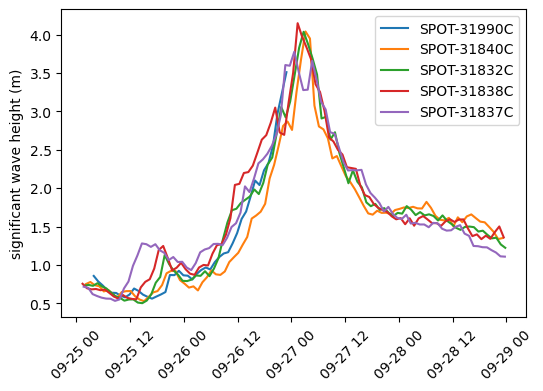

In [14]:
fig, ax = plt.subplots(figsize=(6,4))

for spotter_id in spotter_ids[0:5]:
    spotter_df = spotter_dict[spotter_id]
    only_waves = spotter_df.loc[:, 'energy_density'].notnull()
    ax.plot(
        spotter_df.loc[only_waves].index,
        spotter_df.loc[only_waves, 'significant_height'],
        label=spotter_id,
    )

ax.set_ylabel('significant wave height (m)')
ax.legend()
ax.tick_params(axis='x', rotation=45)